In [1]:
import cv2

In [2]:
print(cv2.__version__)

4.8.1


In [3]:
img = cv2.imread(r"D:\SmartBridge\VIT_morning_slot\dataset\Training\elephants\2Q__ (10).jpeg")

In [4]:
print(img)

[[[178 167 159]
  [233 226 217]
  [215 216 206]
  ...
  [237 197 179]
  [235 197 179]
  [235 197 179]]

 [[121 112 103]
  [207 203 192]
  [178 179 169]
  ...
  [236 198 180]
  [235 197 179]
  [235 197 179]]

 [[166 160 149]
  [231 230 216]
  [160 164 152]
  ...
  [236 199 179]
  [236 199 179]
  [236 199 179]]

 ...

 [[ 60 149 110]
  [ 46 137  98]
  [ 53 141 105]
  ...
  [109 142 138]
  [104 138 132]
  [ 89 122 118]]

 [[ 39 127  87]
  [ 40 129  89]
  [ 53 142 103]
  ...
  [110 138 138]
  [122 150 150]
  [110 138 138]]

 [[ 13  99  57]
  [ 43 132  89]
  [ 52 139 101]
  ...
  [129 154 156]
  [143 168 170]
  [119 144 146]]]


In [5]:
# Extracting the height and width of an image 
img.shape

(183, 275, 3)

# Extracting the RGB values of a pixel

In [6]:
# Extracting RGB values. 
# Here we have randomly chosen a pixel 
# by passing in 100, 100 for height and width. 
(B, G, R) = img[100, 100] 

# Displaying the pixel values 
print("R = {}, G = {}, B = {}".format(R, G, B)) 

# We can also pass the channel to extract 
# the value for a specific channel 
B = img[100, 100, 0] 
print("B = {}".format(B)) 


R = 82, G = 69, B = 52
B = 52


Now we will focus on extracting the RGB values of an individual pixel.
Note – OpenCV arranges the channels in BGR order. So the 0th value will correspond to Blue pixel and not Red.

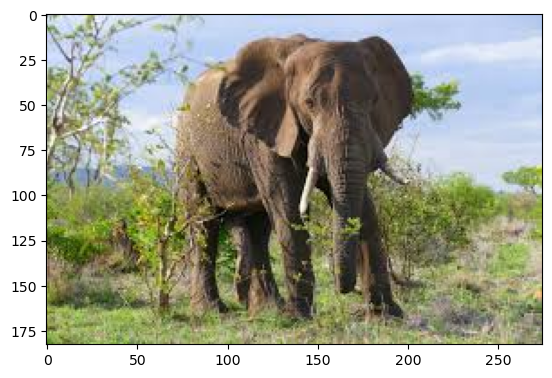

In [7]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
plt.imshow(img2)

# Extracting the Region of Interest (ROI)

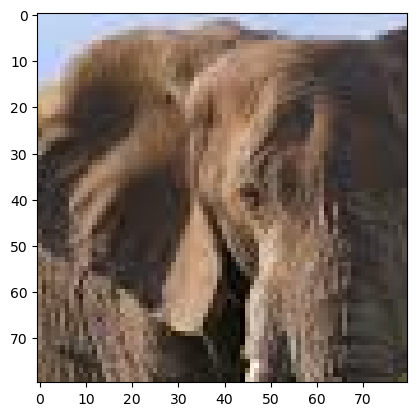

In [8]:
# We will calculate the region of interest  
# by slicing the pixels of the image 
roi = img2[10:90,100:180]
plt.imshow(roi)

# Resizing the Image

In [9]:
# resize() function takes 2 parameters,  
# the image and the dimensions 
resize = cv2.resize(img2, (800, 800)) 

# blurring the image

In [10]:
img_blur=cv2.blur(img,(10,20))
cv2.imshow("blurr",img_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
cv2.imshow("read image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Inside the cv2.waitKey() function, you can provide any value to close the image and continue with further lines of code.

# Edge detection in an image

In [13]:
#we use the canny edge detection for many popular tasks in edge detection such as lane detection, sketching, border removal,

edges = cv2.Canny(img,200,200)
#Canny is edge detector
cv2.imshow("original",img)
cv2.waitKey(0)
cv2.imshow("edge image",edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


# image filtering

In [ ]:
The Gaussian Filter is similar to the mean filter however it involves a weighted average of the surrounding pixels

### The Median filter is a common technique for smoothing. Median smoothinging is widely used in edge detection algorithms because under certain conditions, it preserves edges while removing noise.

In [16]:
noise = cv2.imread(r"D:\SmartBridge\VIT_morning_slot\OpenCV\noisy.png")
cv2.imshow("original image",noise)
cv2.waitKey(0)
gaussian = cv2.GaussianBlur(noise,(5,5),0)
cv2.imshow("gaussian image",gaussian)
cv2.waitKey(0)
median = cv2.medianBlur(noise,5)
cv2.imshow("median image",median)
cv2.waitKey(0)
cv2.destroyAllWindows()


# image thresholding

Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255)

In [17]:
thresh = cv2.imread(r"D:\SmartBridge\VIT_morning_slot\dataset\Training\elephants\2Q__ (10).jpeg")
cv2.imshow("original image",thresh)
cv2.waitKey(0)
ret , thresh1 = cv2.threshold(thresh,127,255,cv2.THRESH_BINARY)
cv2.imshow("THRESH_BINARY image",thresh1)
cv2.waitKey(0)
ret , thresh2 = cv2.threshold(thresh,127,255,cv2.THRESH_BINARY_INV)
cv2.imshow("THRESH_BINARY_INV image",thresh2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Draw a rectangle

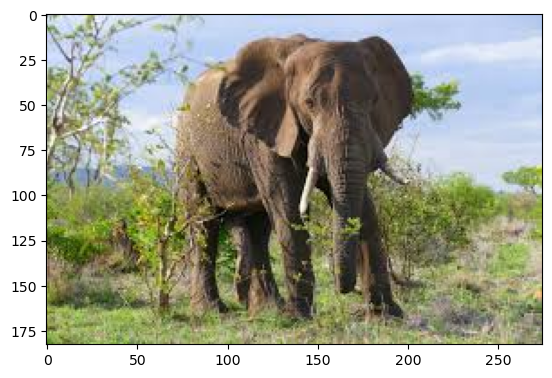

In [18]:
image = cv2.imread(r"D:\SmartBridge\VIT_morning_slot\dataset\Training\elephants\2Q__ (10).jpeg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
plt.imshow(image)


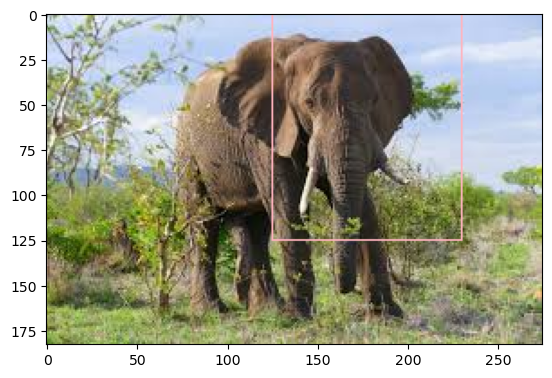

In [19]:
rect = cv2.rectangle(image, (125,0),(230,125),(255,180,190),1)
plt.imshow(rect)

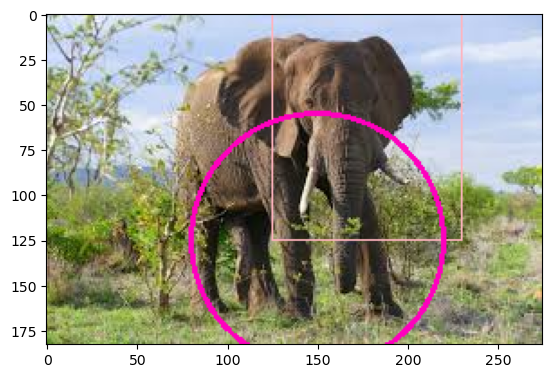

In [20]:
circle = cv2.circle(image, (150,125),70,(255,0,190),2)
plt.imshow(circle)

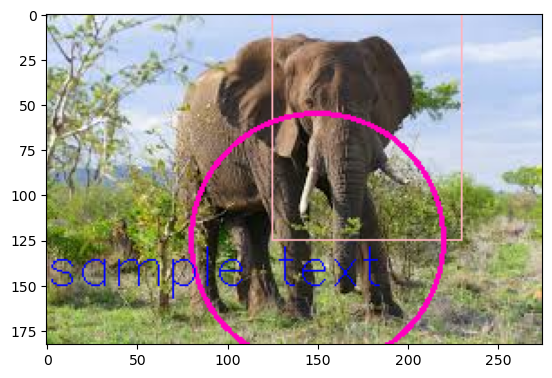

In [21]:
text = cv2.putText(image,"sample text",(0,150),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)
plt.imshow(text)

# working with videos

we use the VideoCapture module in the OpenCV library to capture a live video. We create a VideoCapture object using the constructor provided in the module. The argument to the constructor can be either a device index or the path of the video file. A device index is a number used to identify the webcam and, in most cases, the value is 0 The object of the VideoStream module enables us to capture frame-by-frame video data.

In [44]:
video =cv2.VideoCapture(0)   # path of video  0 live streaming 1 external camera
data, frame = video.read()
cv2.imshow("streaming image",frame)
cv2.waitKey(0)
video.release()
cv2.destroyAllWindows()

In [22]:
video=cv2.VideoCapture("bird.mp4")
while (video.isOpened()):
    data,frame = video.read()
    cv2.imshow("Steaming image",frame)
    cv2.imwrite("sample.jpg",frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

In [43]:
import cv2
video = cv2.VideoCapture(0) #0 indictes from internal camera...... 1 , usb camera
if(video.isOpened()==False):
    print("error loading")
    
w = int(video.get(3))
h = int(video.get(4))
size = (w,h)
out = cv2.VideoWriter("output.avi",cv2.VideoWriter_fourcc(* 'MJPG'),10,size)
while True: #  boolen value , frame - 0 means the video is stil captring 1 means no video frames avalable
    data , frame = video.read()
    if data == True:
        out.write(frame)
        cv2.imshow("streaaming",frame)
        if cv2.waitKey(1) & 0xFF == ord("a"):
            break
    else:
        break
        
video.release()
out.release()
cv2.destroyAllWindows()
    